# Overview of Hostile Post Detection in Hindi
- **Goals:** To predict the label set of the set of post collected from Twitter and facebook.

- **Traning data:** post with their label.

- **Tesing data:** set of posts.
- **Types of post:** 
1. *Fake News:* A claim or information that is verified to be not true.
2. *Hate Speech:* A post targeting a specific group of people based on their ethnicity, religious beliefs, geographical belonging, race, etc., with malicious intentions of spreading hate or encouraging violence.
3. *Offensive:* A post containing profanity, impolite, rude, or vulgar language to insult a targeted individual or group.
4. *Defamation:* A mis-information regarding an individual or group.
5. *Non-hostile:* A post without any hostility.

## Exploring dataset

In [51]:
# importing libraries
import pandas as pd     
import numpy as np
import matplotlib.pyplot as plt

In [52]:
#load data

data = pd.read_csv("dataset.csv")

In [53]:
# How many posts do we have in training set

print("We have", data.shape[0], "posts in the training set.")

We have 5728 posts in the training set.


In [54]:
data.head()

,Unique ID,Post,Labels Set,Unnamed: 3,Unnamed: 4
0,1,मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्क...,"hate,offensive",NaN,NaN
1,2,सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...,non-hostile,NaN,NaN
2,3,"सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील...",non-hostile,NaN,NaN
3,4,@prabhav218 साले जेएनयू छाप कमिने लोग हिन्दुओं...,"defamation,offensive",NaN,NaN
4,5,#unlock4guidelines - अनलॉक-4 के लिए गाइडलाइन्स...,non-hostile,NaN,NaN


In [55]:
data.tail()

,Unique ID,Post,Labels Set,Unnamed: 3,Unnamed: 4
5723,5724,उदितराज जी हिम्मत जुटा कर उस नेता के लिए कुछ ...,hate,NaN,NaN
5724,5725,उप्र: पीएम रिपोर्ट में खुलासा: हार्टअटैक से हु...,non-hostile,NaN,NaN
5725,5726,नौकरी गंवा चुके दोस्त की मदद: नगद के बजाए गिफ्...,non-hostile,NaN,NaN
5726,5727,बंगाल में हिन्दू मरे हैं इसलिए मुझे कोई फर्क न...,fake,NaN,NaN
5727,5728,रक्षा मंत्री @rajnathsingh ने पूर्व राष्ट्रपति...,non-hostile,NaN,NaN


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unique ID   5728 non-null   int64  
 1   Post        5728 non-null   object 
 2   Labels Set  5728 non-null   object 
 3   Unnamed: 3  0 non-null      float64
 4   Unnamed: 4  0 non-null      float64
dtypes: float64(2), int64(1), object(2)
memory usage: 223.9+ KB


In [57]:
#removing extra columns
data=data.drop(data.columns[[0,3,4]], axis=1)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Post        5728 non-null   object
 1   Labels Set  5728 non-null   object
dtypes: object(2)
memory usage: 89.6+ KB


In [59]:
data.head()

,Post,Labels Set
0,मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्क...,"hate,offensive"
1,सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...,non-hostile
2,"सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील...",non-hostile
3,@prabhav218 साले जेएनयू छाप कमिने लोग हिन्दुओं...,"defamation,offensive"
4,#unlock4guidelines - अनलॉक-4 के लिए गाइडलाइन्स...,non-hostile


In [60]:
data.tail()

,Post,Labels Set
5723,उदितराज जी हिम्मत जुटा कर उस नेता के लिए कुछ ...,hate
5724,उप्र: पीएम रिपोर्ट में खुलासा: हार्टअटैक से हु...,non-hostile
5725,नौकरी गंवा चुके दोस्त की मदद: नगद के बजाए गिफ्...,non-hostile
5726,बंगाल में हिन्दू मरे हैं इसलिए मुझे कोई फर्क न...,fake
5727,रक्षा मंत्री @rajnathsingh ने पूर्व राष्ट्रपति...,non-hostile


In [61]:
#Calculating the null values in each columns

data.isnull().sum()

Post          0
Labels Set    0
dtype: int64

###Number of columns and rows in train data set




In [62]:
data.shape
print(data.shape,"is the dimension of the data")

(5728, 2) is the dimension of the data


**--> Checking for the duplicates in the dataset.**

In [63]:
print(len(data['Post'])-len(set(data['Post'])))

10


In [64]:
dups_shape = data.pivot_table(index=['Post'], aggfunc='size')
print (dups_shape)

Post
\nHimat Gohel\n@himatgohel\nBJP विधायक अनिल उपाध्याय की इस हरकत पर क्या कहेगे मोदी जी, give your \n your Reaction की ये पूरा हिन्दुस्तान देख सके..👇                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [65]:
d={}
total=0
for i in data['Labels Set']:
    ar=list(i.split(','))
    for j in ar:
        try:
            d[j]+=1
        except:
            d[j]=1
        total+=1


percentageHolder={}
for i in d:
    percentageHolder[i]=str((d[i]/total)*100)[:5]+'%'



table={'count':d,'percentage':percentageHolder}
print(pd.DataFrame(table))

             count percentage
hate           792     12.58%
offensive      742     11.79%
non-hostile   3050     48.47%
defamation     564     8.963%
fake          1144     18.18%


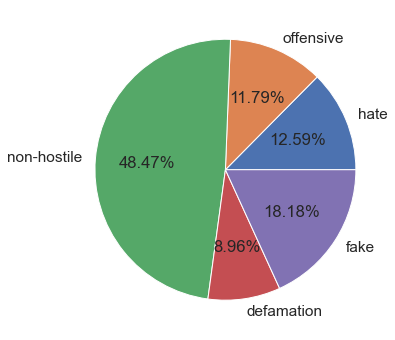

In [66]:
#pie chart creation

labels = list(d.keys())
values = list(d.values())
plt.figure(figsize=(6,6))
plt.pie(values, labels=labels,autopct="%1.2f%%")
plt.show()

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

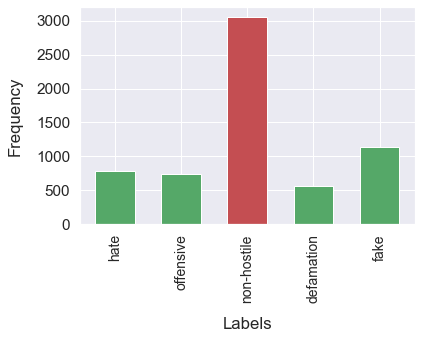

In [67]:
plt.bar(d.keys(), d.values(), 0.6, color=['g','g','r','g','g'])
plt.xlabel("Labels", labelpad=14)
plt.ylabel("Frequency", labelpad=14)
sb.set(font_scale=1.4)
plt.xticks(fontsize=14, rotation=90)

Analysis:

1) We observe that non-hostile posts has the highest proportion.